<a href="https://colab.research.google.com/github/bhavya1234/ICTA--Assignments-and-Case-study/blob/main/Bhavya_S_L_(Case_study_on_unsupervised_learning_Wine_clust_csv).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Case study on unsupervised learning
(Wine_clust.csv)

---


Try out different clustering models in the given dataset. Find the optimum
number of clusters in each model and create the model with optimum number of
clusters. Also learn about dB scan clustering and implement it

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/Wine_clust .csv')

In [3]:
data.sample(5)

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
63     12.37        1.13  2.16          19.0         87           3.50   
135    12.60        2.46  2.20          18.5         94           1.62   
74     11.96        1.09  2.30          21.0        101           3.38   
169    13.40        4.60  2.86          25.0        112           1.98   
43     13.24        3.98  2.29          17.5        103           2.64   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
63         3.10                  0.19             1.87             4.45  1.22   
135        0.66                  0.63             0.94             7.10  0.73   
74         2.14                  0.13             1.65             3.21  0.99   
169        0.96                  0.27             1.11             8.50  0.67   
43         2.63                  0.32             1.66             4.36  0.82   

     OD280  Proline  
63    2.87      420  
135   1.58      695  
74    3.13      886  
169   1.92      630  
43    3.00      680

In [4]:
data.shape

(178, 13)

In [5]:
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [6]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.describe()


Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_Intensity         Hue       OD280      Proline  
count       178.000000  178.000000  178.000000   178.000000  
mean          5.058090    0.957449    2.611685   746.893258  
std           2.318286    0.228572    0.709990   314.907474  
min           1.280000    0.480000    1.270000   278.000000  
25%           3.220000    0.782500    1.937500   500.500000  
50%           4.690000    0.965000    2.780000   673.500000  
75%           6.200000    1.120000    3.170000   985.000000  
max          13.000000    1.710000    4.000000  1680.000000

#Visualizing Dataset

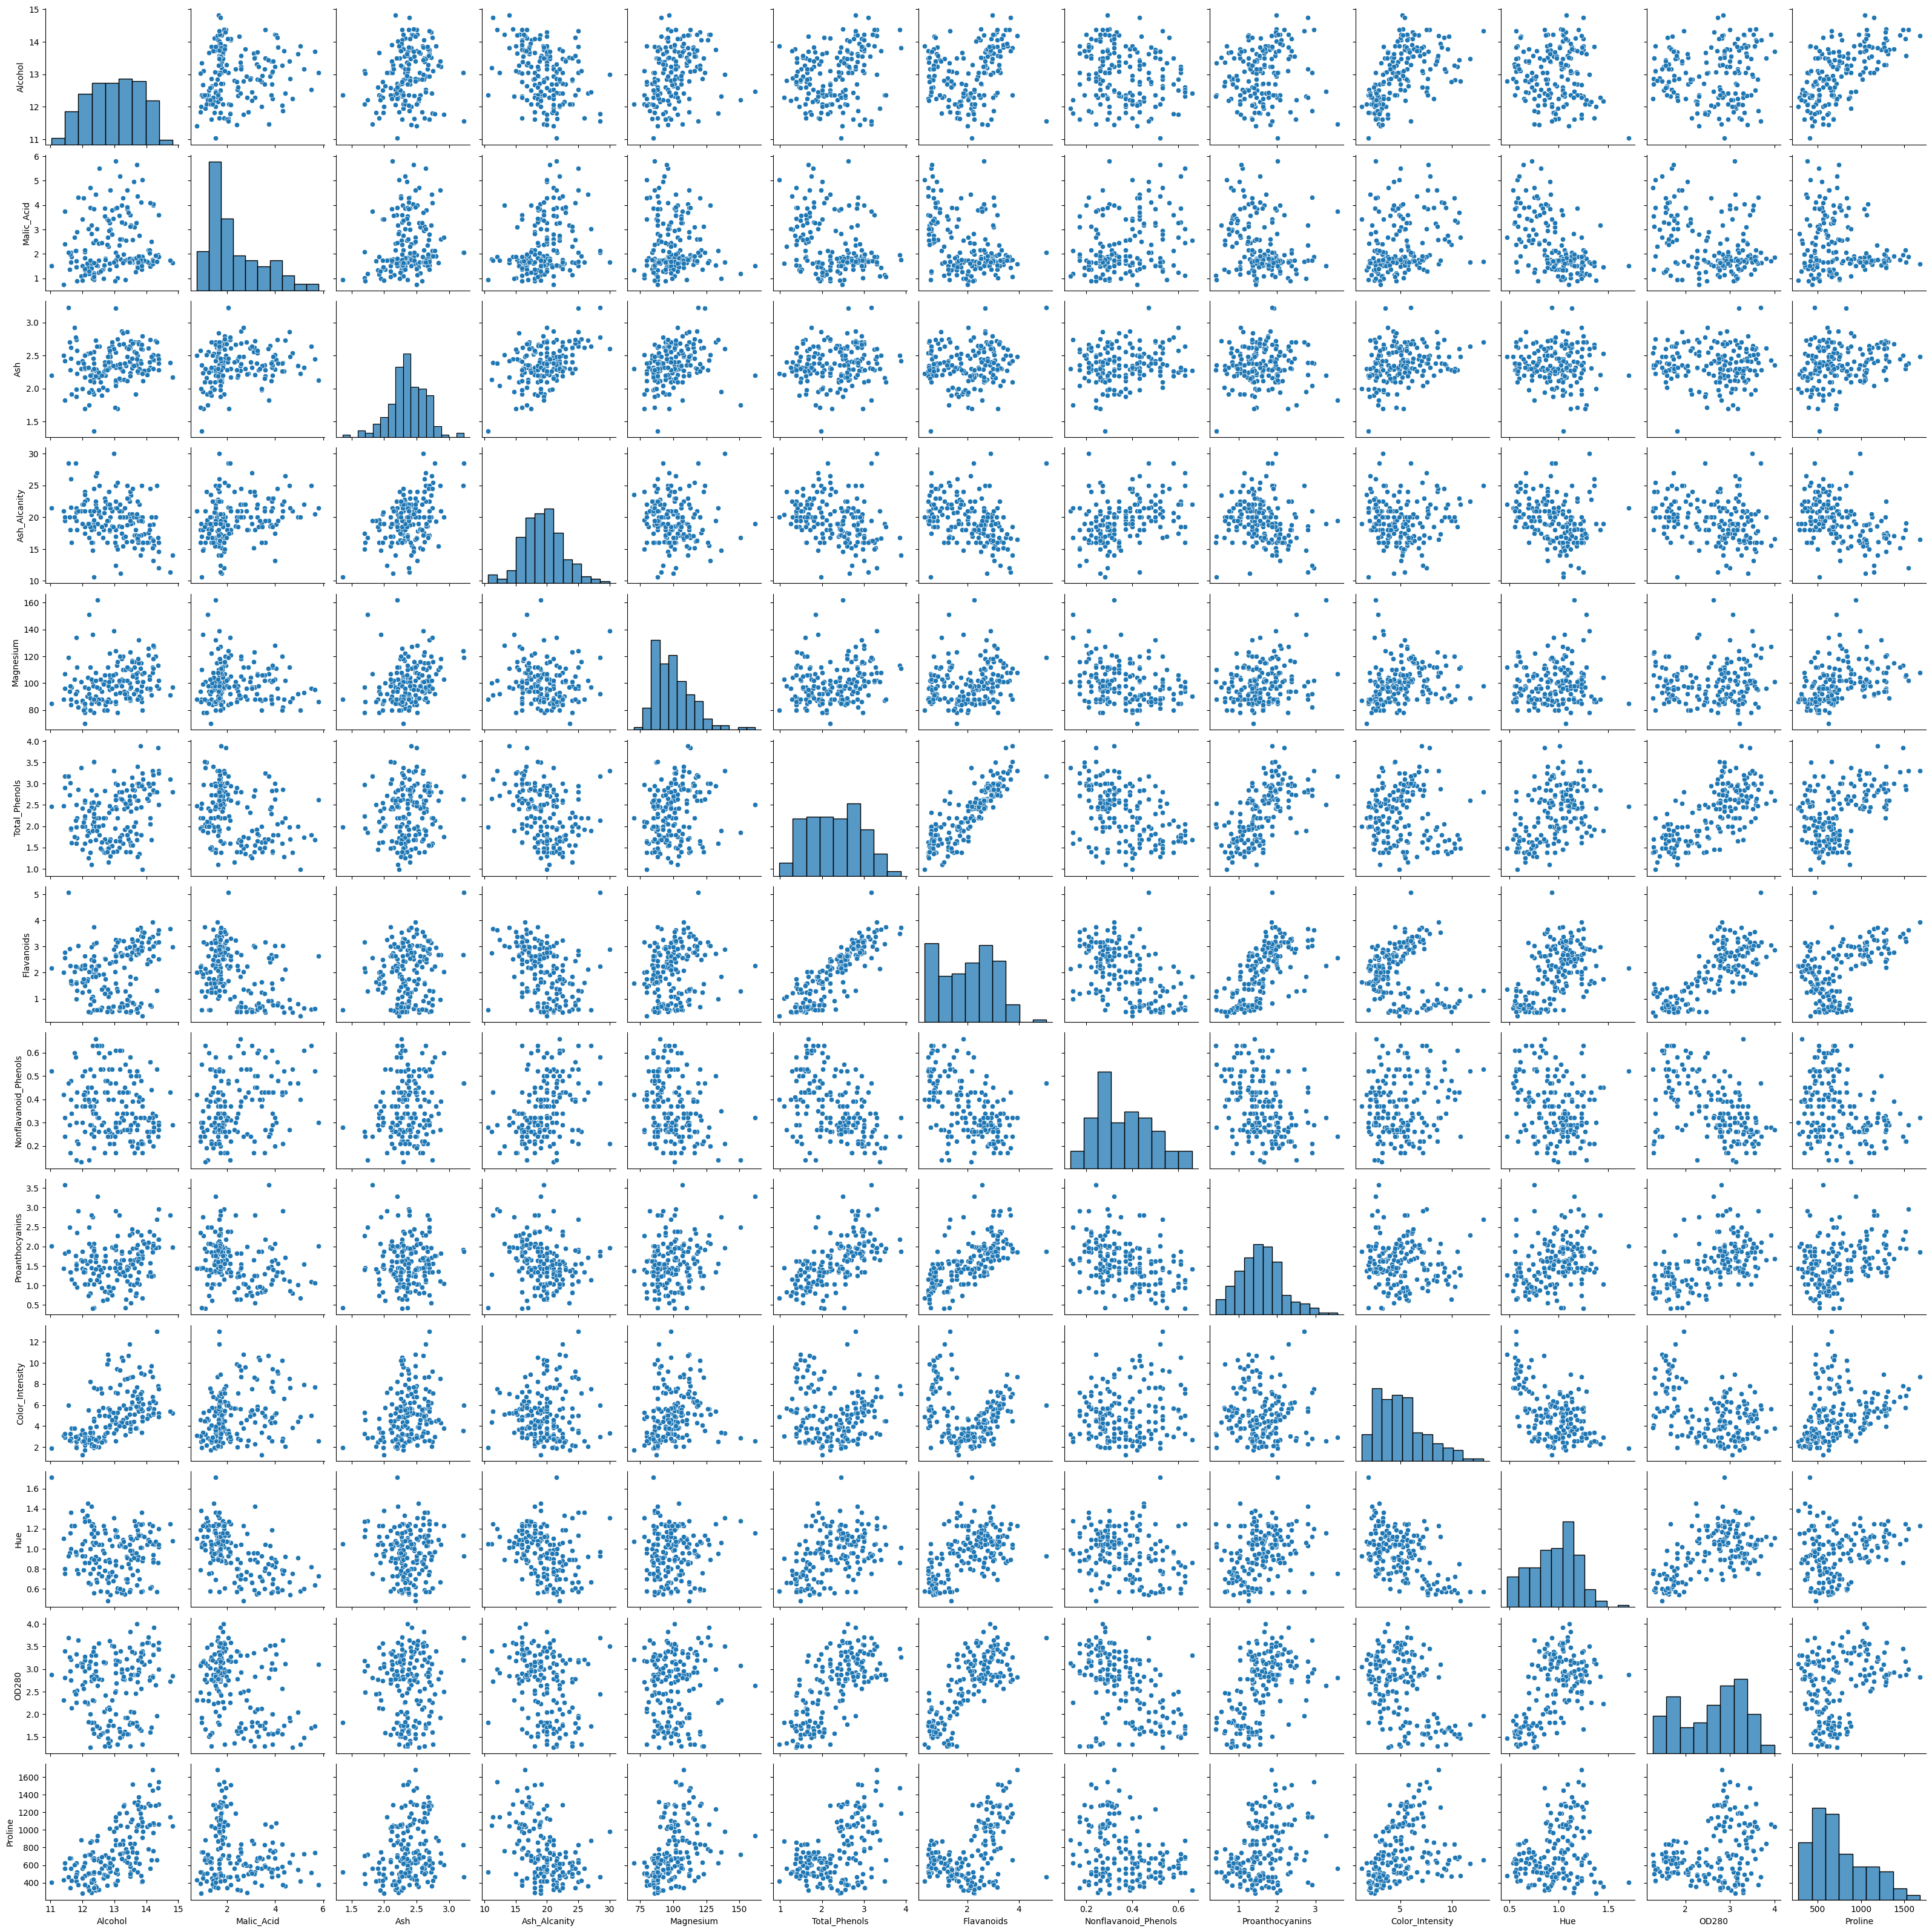

In [9]:
X = data.iloc[:,:]
X.head()
sns.pairplot(X)
plt.show()

#Outliers

In [11]:
from sklearn.preprocessing import MinMaxScaler
#Normalize data to view boxplot
scalerMM = MinMaxScaler()
df= pd.DataFrame(scalerMM.fit_transform(data))
df.columns=data.columns

In [12]:
df.sample(4)

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
139  0.476316    0.438735  0.668449      0.690722   0.336957       0.462069   
74   0.244737    0.069170  0.502674      0.536082   0.336957       0.827586   
115  0.000000    0.152174  0.449198      0.561856   0.163043       0.510345   
38   0.536842    0.150198  0.395722      0.252577   0.304348       0.489655   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
139    0.054852              0.754717         0.126183         0.310580   
74     0.379747              0.000000         0.391167         0.164676   
115    0.386076              0.735849         0.504732         0.052901   
38     0.485232              0.283019         0.302839         0.206485   

          Hue     OD280   Proline  
139  0.333333  0.322344  0.222539  
74   0.414634  0.681319  0.433666  
115  1.000000  0.586081  0.092011  
38   0.569106  0.520147  0.529244

<Axes: >

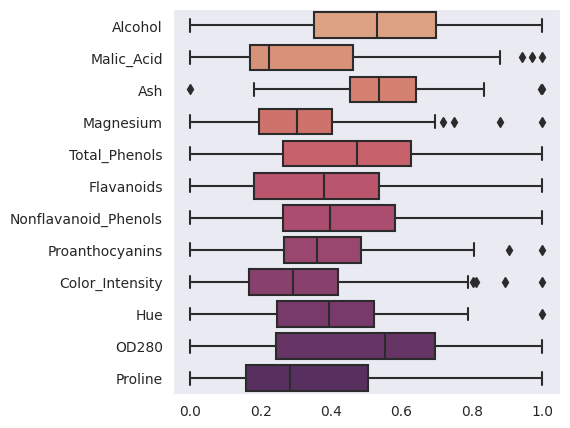

In [13]:
#View outliers for non Gaussian distributions
plt.figure(figsize=(5,5))
sns.set_style("dark")
sns.boxplot(data=df.drop(['Ash_Alcanity'], axis=1), orient="h", palette = 'flare')

#Triangular Heat Map

<Axes: >

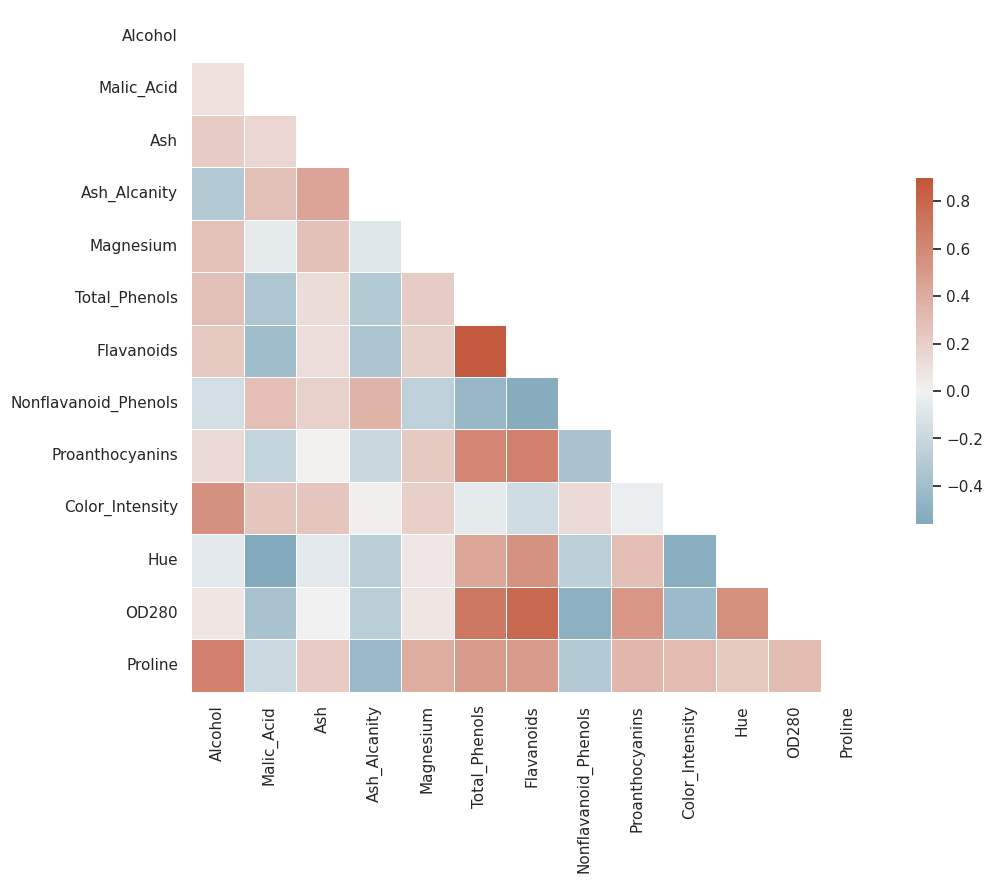

In [14]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(data.corr(), dtype=bool))

corr= df.corr(method ='pearson')

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#Transform Input vectors

In [15]:
# Scaling - Standardize the numerical variables
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer

yeojohnson = ColumnTransformer([
    ('ptransform',PowerTransformer(method='yeo-johnson', standardize=False), slice(0,13))
])

scaling = ColumnTransformer([
    ('scale',StandardScaler(), slice(0,13))
])

In [16]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('yeojohnson',yeojohnson),
    ('scaling',scaling)
])

In [20]:
# Apply the transformation
data_transformed = pipe.fit_transform(df)


In [21]:
#verify shape remains same after tranformation
tuple(map(lambda i, j: i - j, data.shape, data_transformed.shape))

(0, 0)

In [22]:
# View sample records after transformation
data_transformed[0:2,:]

array([[ 1.52186248, -0.45545275,  0.21012283, -1.1819821 ,  1.69236432,
         0.81955072,  1.03238764, -0.6043161 ,  1.20713928,  0.45218071,
         0.36935742,  2.04916349,  1.0840084 ],
       [ 0.24413997, -0.3583155 , -0.83960078, -2.66540772,  0.18809926,
         0.59005029,  0.74199479, -0.80180008, -0.4940391 , -0.13065416,
         0.41290664,  1.15193108,  1.05047556]])

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector,

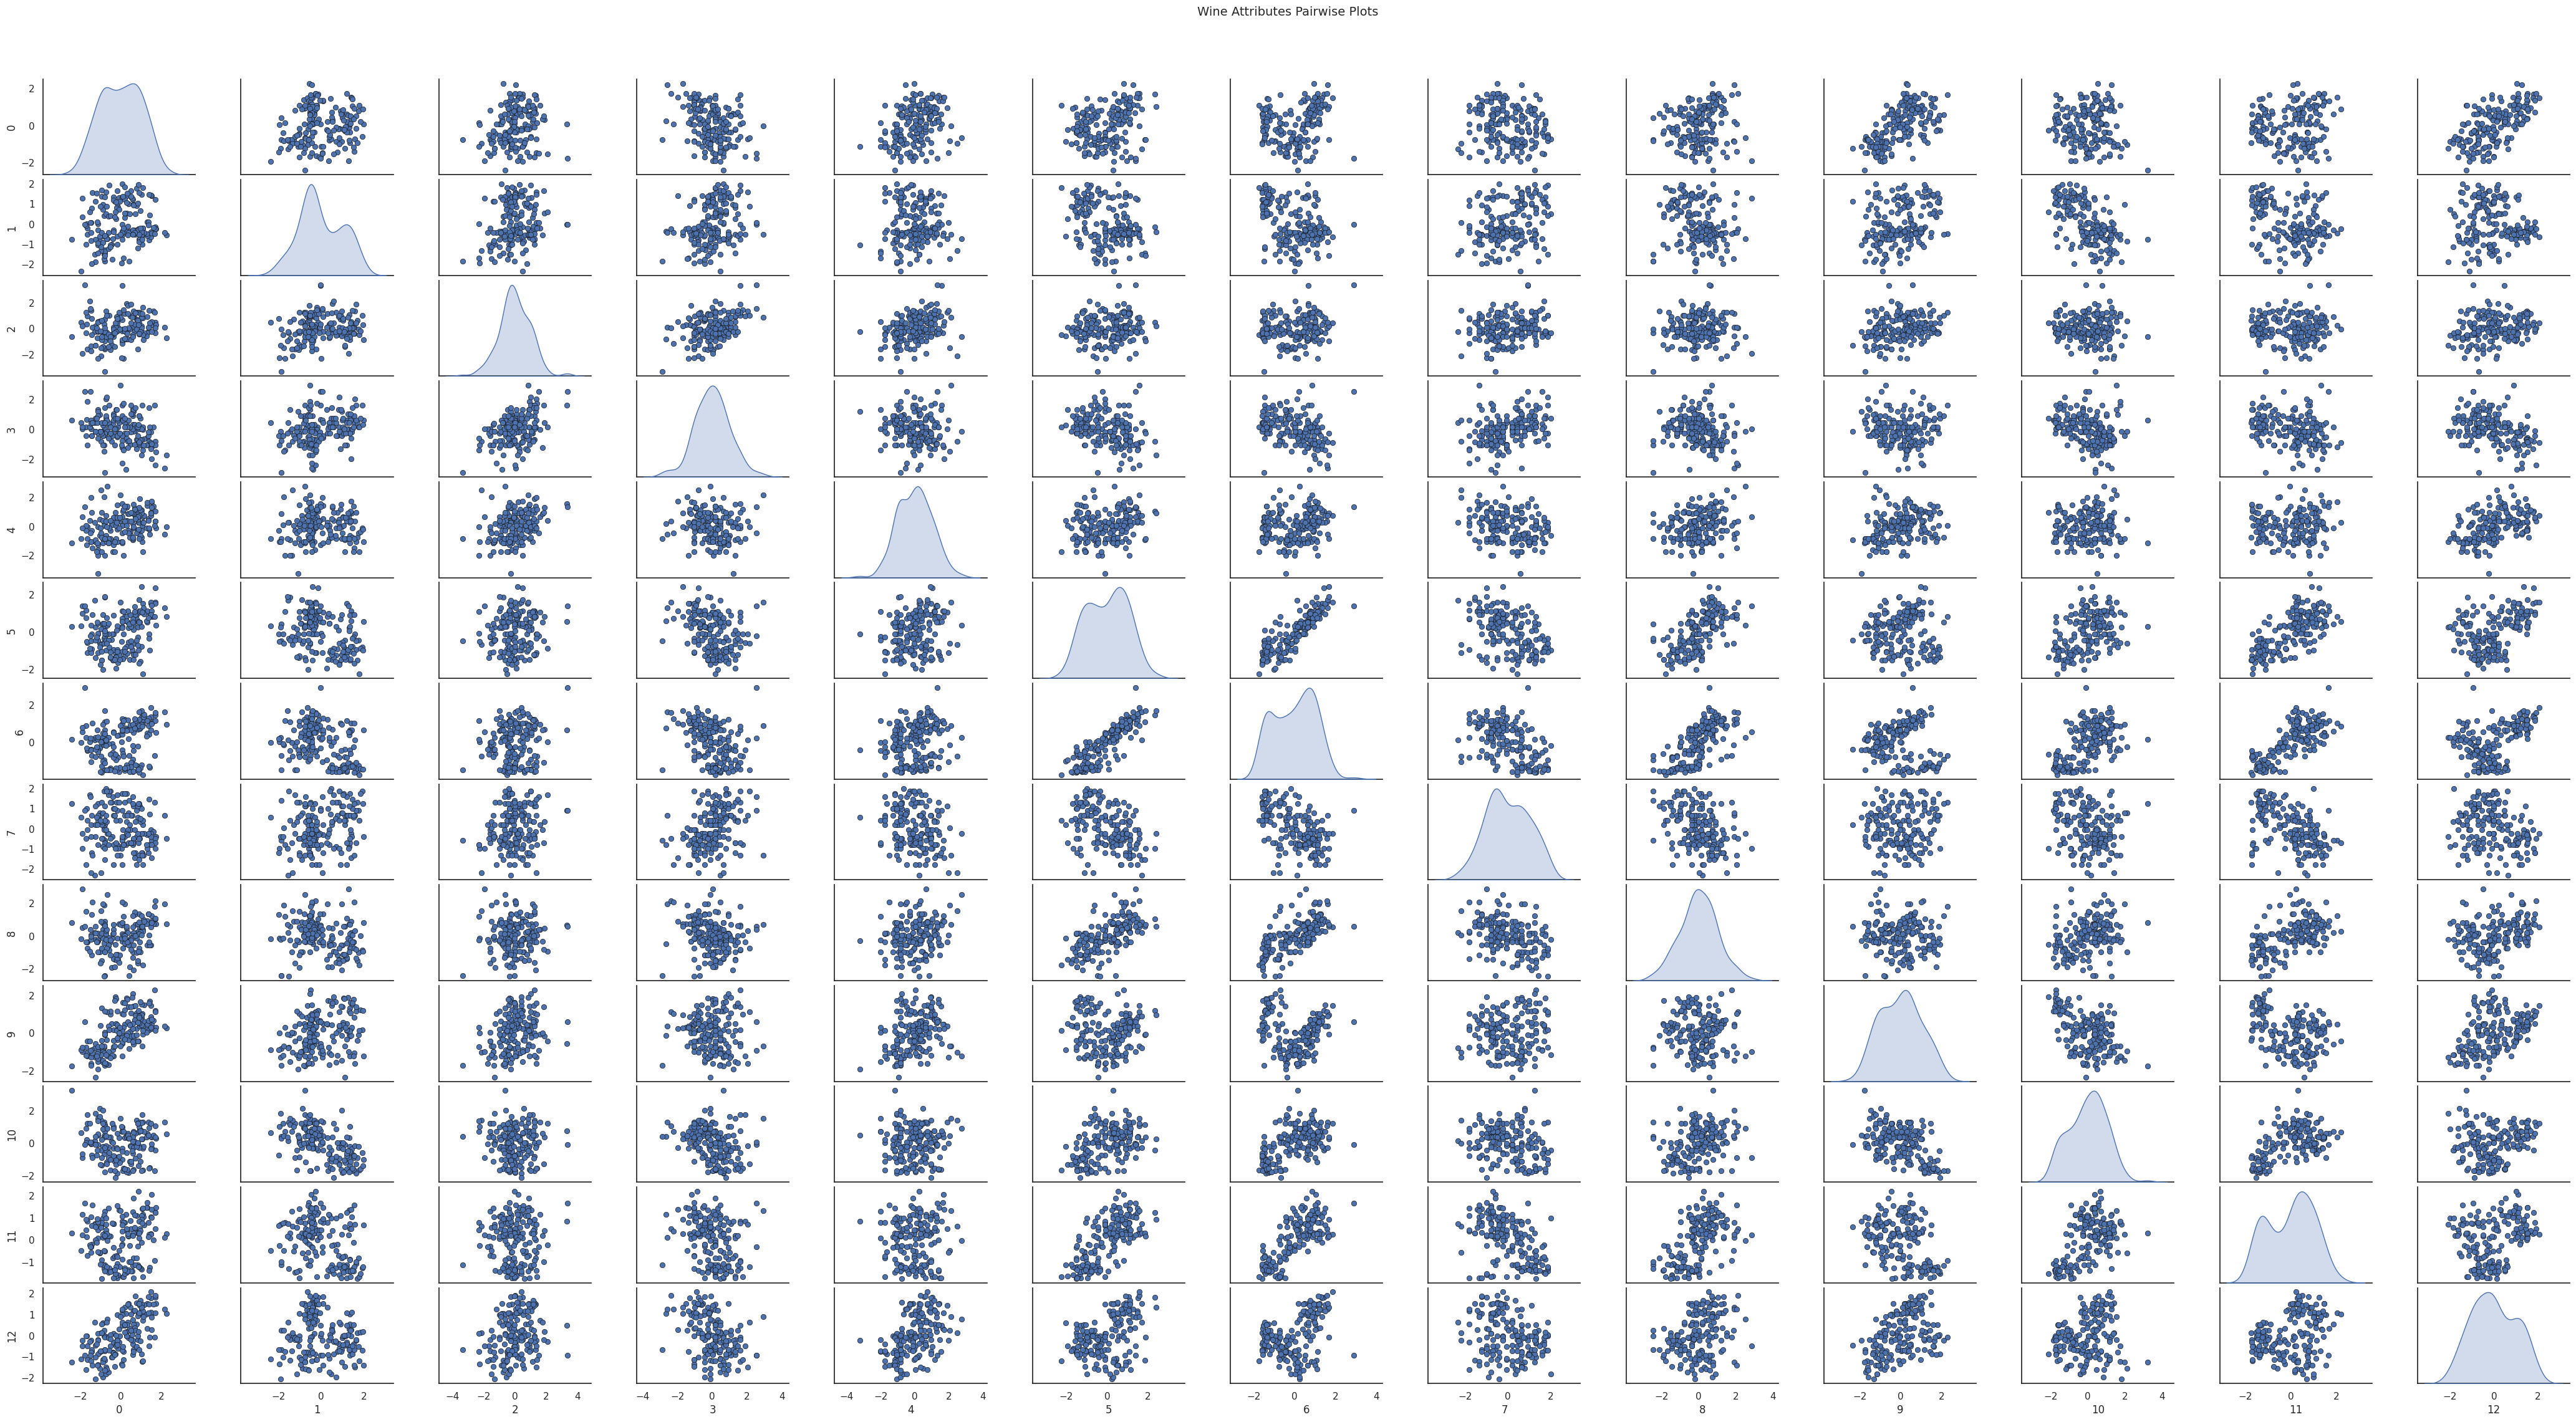

In [23]:
# Pair-wise Scatter Plots
wt = pd.DataFrame(data_transformed)
pp = sns.pairplot(wt, height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

In [24]:
# View Tranformation steps
pipe.named_steps

{'yeojohnson': ColumnTransformer(transformers=[('ptransform',
                                  PowerTransformer(standardize=False),
                                  slice(0, 13, None))]),
 'scaling': ColumnTransformer(transformers=[('scale', StandardScaler(),
                                  slice(0, 13, None))])}

#Fit the model and Analyze

# Agglomerative / Hierarchical Clustering

View Dendrogram

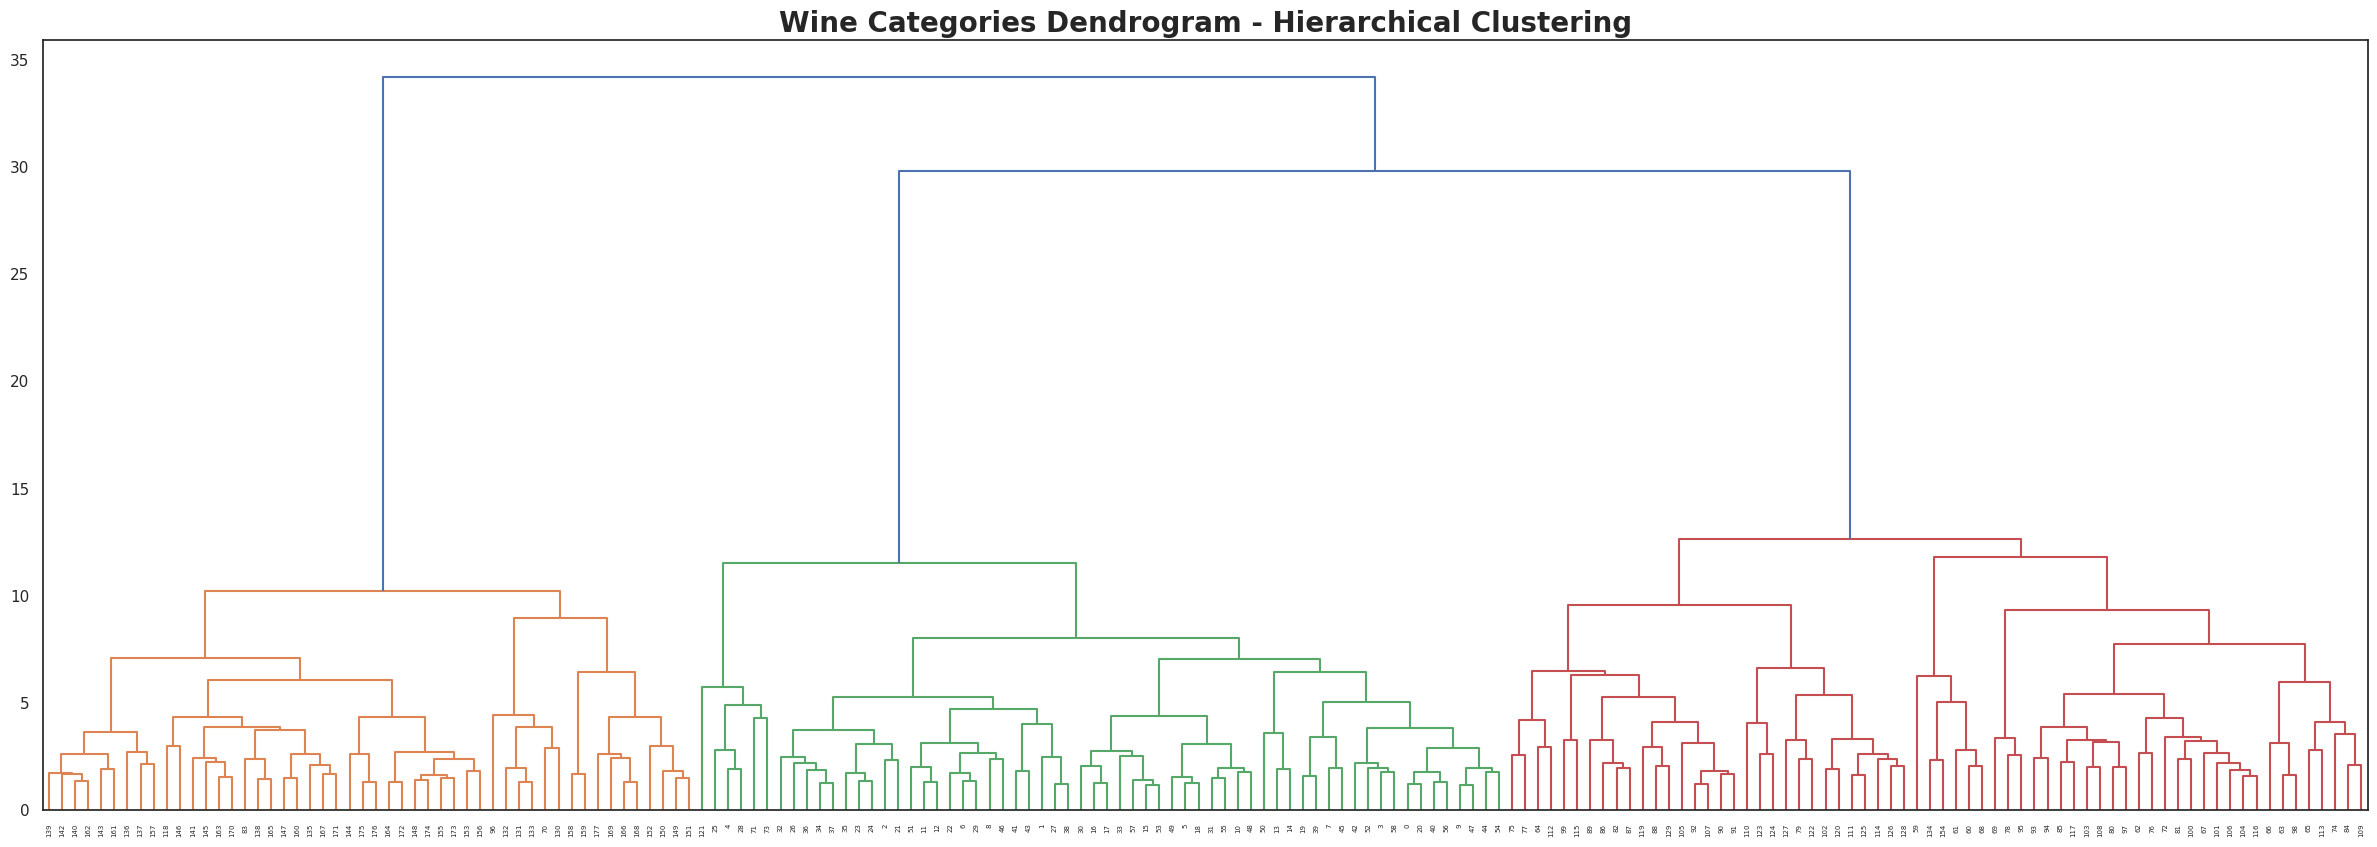

In [25]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
Z = linkage(data_transformed, method = "ward", metric = "euclidean")
plt.figure(figsize=(30, 10))
plt.title("Wine Categories Dendrogram - Hierarchical Clustering",fontsize=20,fontweight="bold")
dend = shc.dendrogram(Z)

In [26]:
#Function to plot truncated dendrogram
def plot_dendrogram(model, **kwargs):

    count = np.zeros(model.children_.shape[0])
    nsamples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        currentcount = 0
        for child_idx in merge:
            if child_idx < nsamples:
                currentcount += 1
            else:
                currentcount += count[child_idx - nsamples]
        count[i] = currentcount

    linkagematrix = np.column_stack(
        [model.children_, model.distances_, count]
    ).astype(float)
    dendrogram(linkagematrix, **kwargs)

# Evaluate with Hyperparameters

In [27]:
from sklearn.metrics import silhouette_score ,calinski_harabasz_score , davies_bouldin_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# Defining a function to find the optimal number of clusters' n_clusters parameter
# Note that we are using a dataset that contains only numeric features.

def agglomerationScorecard(transformed_df):
    arr = np.empty((10, 10), dtype=object)
    # Number of clusters to search for and silhouette_scores list
    range_n_clusters = [2, 3, 4, 5]
    linkages = ['ward','average','complete','single']
    silhouette_scores = []
    cal_har_scores =[]
    dav_boulds =[]
    clusters=[]
    linkages1 = []
    totals = []
    cophenetics=[]
    # create an Empty DataFrame object
    scorecard = pd.DataFrame()
    for n_clusters in range_n_clusters:
         for link in linkages:
            cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage=link)
            labels_ = cluster.fit_predict(transformed_df)
            silhouette_avg = silhouette_score(transformed_df, labels_)
            cal_har_score = calinski_harabasz_score(transformed_df, labels_)
            dav_bould = davies_bouldin_score(transformed_df, labels_)
            Z = linkage(transformed_df, method = link, metric = 'euclidean')
            cophenetic, coph_dists = cophenet(Z, pdist(transformed_df))
            clusters.append(n_clusters)
            linkages1.append(link)
            silhouette_scores.append(silhouette_avg)
            cal_har_scores.append(cal_har_score)
            dav_boulds.append(dav_bould)
            totals.append(silhouette_avg + cal_har_score + dav_bould )
            cophenetics.append(cophenetic)
    scorecard['clusters'] = clusters
    scorecard['linkage'] = linkages1
    scorecard['silhouette'] = silhouette_scores
    scorecard['calinski_harabasz'] =cal_har_scores
    scorecard['davies_bouldin']  = dav_boulds
    scorecard['Total']  = totals
    scorecard['cophenetic']  = cophenetics
    return scorecard

In [28]:
# View the total of silhouette calinski_harabasz_score and davies_bouldin_score from highest to lowest scores
# View cophenetic coefficient for the same
s= agglomerationScorecard(data_transformed)
s = s.sort_values(['Total'], ascending=False ,ignore_index=True)
s

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

clusters   linkage  silhouette  calinski_harabasz  davies_bouldin  \
0          3      ward    0.291535          70.003025        1.379177   
1          2      ward    0.253875          59.468947        1.385493   
2          4      ward    0.252371          53.353554        1.929198   
3          5      ward    0.240940          44.890575        1.739883   
4          4  complete    0.212946          34.074994        1.674522   
5          5  complete    0.168800          29.953387        1.461493   
6          4   average    0.228958          25.770568        1.131756   
7          5   average    0.207432          21.188495        1.243309   
8          2  complete    0.082132          11.460391        2.630244   
9          3  complete    0.072912           8.547181        2.206049   
10         3   average    0.161888           4.064821        1.046198   
11         5    single    0.095097           3.112331        0.851053   
12         2   average    0.287586           2.963227        0.567305   
13         2    single    0.287586           2.963227        0.567305   
14         3    single    0.216034           2.996973        0.566391   
15         4    single    0.125336           2.672002        0.629158   

        Total  cophenetic  
0   71.673737    0.679395  
1   61.108316    0.679395  
2   55.535124    0.679395  
3   46.871398    0.679395  
4   35.962461    0.561844  
5   31.583680    0.561844  
6   27.131282    0.782508  
7   22.639236    0.782508  
8   14.172768    0.561844  
9   10.826141    0.561844  
10   5.272907    0.782508  
11   4.058481    0.473435  
12   3.818118    0.782508  
13   3.818118    0.473435  
14   3.779398    0.473435  
15   3.426496    0.473435

Observations:

We discovered the top three records that have ward linkage. Although the cophenetic score is the highest for average linkage, the other metrics are bad. We settle for the ward's second-best cophenetic score (0.662349).
The top two winners in the above scorecard (3 clusters) and two clusters with ward connectivity are examined.

In [33]:
#Add to compare models table
compare_models = pd.DataFrame()
df2 = {'model': 'Agglomerative', 'silhouette': s['silhouette'][0], 'calinski_harabasz': s['calinski_harabasz'][0],'davies_bouldin': s['davies_bouldin'][0]}
compare_models = compare_models.append(df2, ignore_index = True)
compare_models

<ipython-input-33-5ceef481f998>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare_models = compare_models.append(df2, ignore_index = True)


model  silhouette  calinski_harabasz  davies_bouldin
0  Agglomerative    0.291535          70.003025        1.379177

Silhouette score, calinski_harabasz_score and davies_bouldin_score are highest for 3 clusters with ward linkage.

In [35]:
cluster = AgglomerativeClustering(n_clusters=3 , affinity='euclidean',linkage='ward',compute_distances=True)
labels_=cluster.fit_predict(data_transformed)
# Data points spread
cluster.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [37]:
# Data points count per label
unique, counts = np.unique(labels_, return_counts=True)
np.asarray((unique, counts)).T

array([[ 0, 66],
       [ 1, 50],
       [ 2, 62]])

Option 1: Three Clusters
Silhouette score, calinski_harabasz_score and davies_bouldin_score are highest for 3 clusters with ward linkage.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


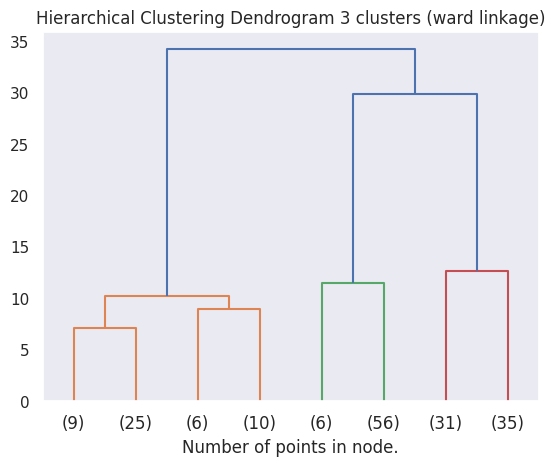

In [51]:
from scipy.cluster.hierarchy import dendrogram

# Perform hierarchical clustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = cluster.fit_predict(data_transformed)

# Calculate the linkage matrix
linkage_matrix = linkage(data_transformed, method='ward')

# Plot the dendrogram
plt.title("Hierarchical Clustering Dendrogram 3 clusters (ward linkage)")
dendrogram(linkage_matrix, truncate_mode="level", p=2)
plt.xlabel("Number of points in node.")
plt.show()


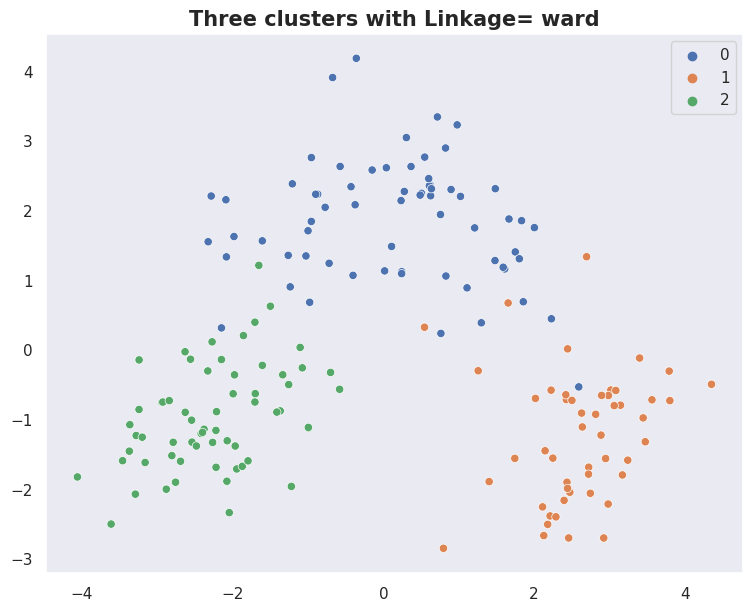

In [46]:
from sklearn import decomposition
# Transform data to visualize data in 2d
sns.set_style('dark')
pca = decomposition.PCA(n_components=3)
wine_pca = pca.fit_transform(data_transformed)
plt.figure(figsize=(9,7))
sns.scatterplot(hue=cluster.labels_, x=wine_pca[:,0], y=wine_pca[:,1],palette="deep")
plt.title("Three clusters with Linkage= ward",fontsize=15,fontweight="bold")
plt.show()

Option 2: Two Clusters
Silhouette score, calinski_harabasz_score and davies_bouldin_score are second highest for 2 clusters with ward linkage.

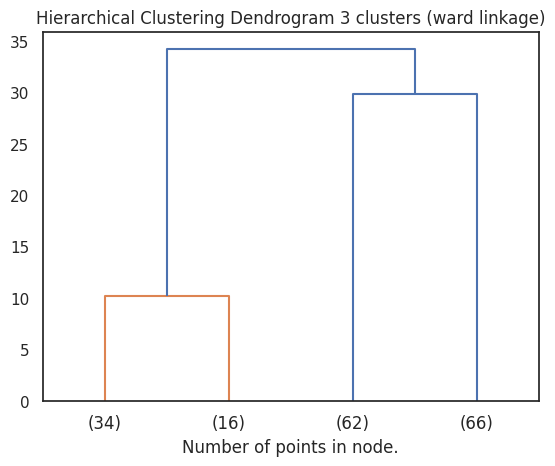

In [40]:
from scipy.cluster.hierarchy import dendrogram

plt.title("Hierarchical Clustering Dendrogram 3 clusters (ward linkage)")
# Plot the top two levels of the dendrogram
plot_dendrogram(cluster, truncate_mode="level", p=1)
plt.xlabel("Number of points in node.")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


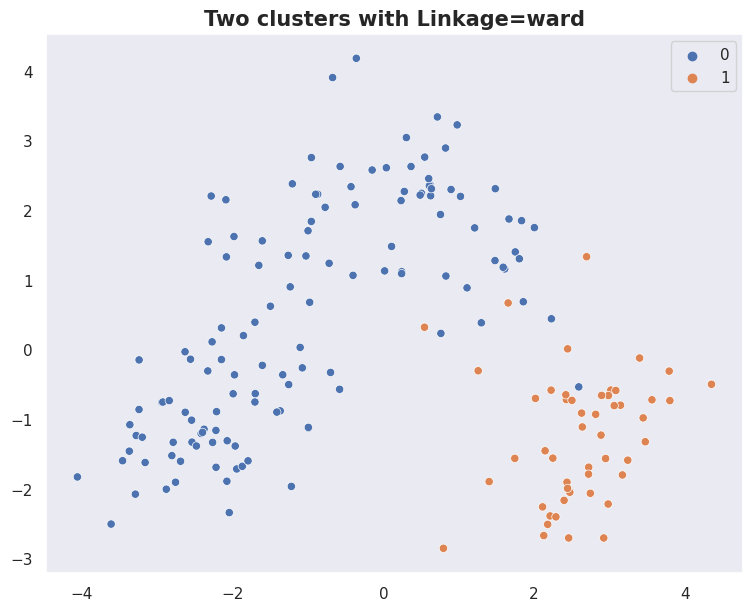

In [48]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Perform clustering with 2 clusters
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = cluster.fit_predict(data_transformed)

# Apply PCA to visualize data in 2D
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(data_transformed)

# Plot the scatterplot with 2 clusters
plt.figure(figsize=(9, 7))
sns.scatterplot(x=wine_pca[:, 0], y=wine_pca[:, 1], hue=labels, palette="deep")
plt.title("Two clusters with Linkage=ward", fontsize=15, fontweight="bold")
plt.show()


#K Means Clustering

We use the WSS to determine candidates for the number of clusters. k-means++ for faster/efficient convergence.

Evaluate k with Elbow Graph

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

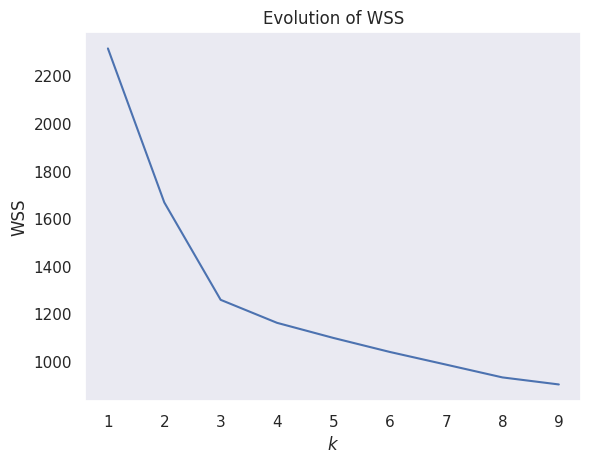

In [52]:
from sklearn.cluster import KMeans

inertia = []
k = range(1,10)
for iter in k:
    kmeans = KMeans(init = 'k-means++',n_clusters=iter, random_state=2)
    kmeans.fit(data_transformed)
    y_kmeans = kmeans.predict(data_transformed)
    centers = kmeans.cluster_centers_
    inertia.append(kmeans.inertia_ ) # we already store this for later, inertia=WSS

plt.figure()
plt.title("Evolution of WSS")
plt.plot(k, inertia)
plt.ylabel("WSS")
plt.xlabel("$k$")
plt.xticks(k)
plt.show()

Observations: The elbow graph indicates an optima of 3 clusters

#Apply K Means clustering

In [54]:
kmeans = KMeans(init = 'k-means++' ,n_clusters=3, random_state=2)
kmeans.fit(data_transformed)
y_kmeans = kmeans.predict(data_transformed)
# Data points spread
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [55]:
# Data points count per label
unique, counts = np.unique(y_kmeans, return_counts=True)
np.asarray((unique, counts)).T

array([[ 0, 51],
       [ 1, 62],
       [ 2, 65]])

Aggloramative had resulted in 3 clusters with array

0 : 59

1: 56

2: 63

**Visualize Scatter plot**

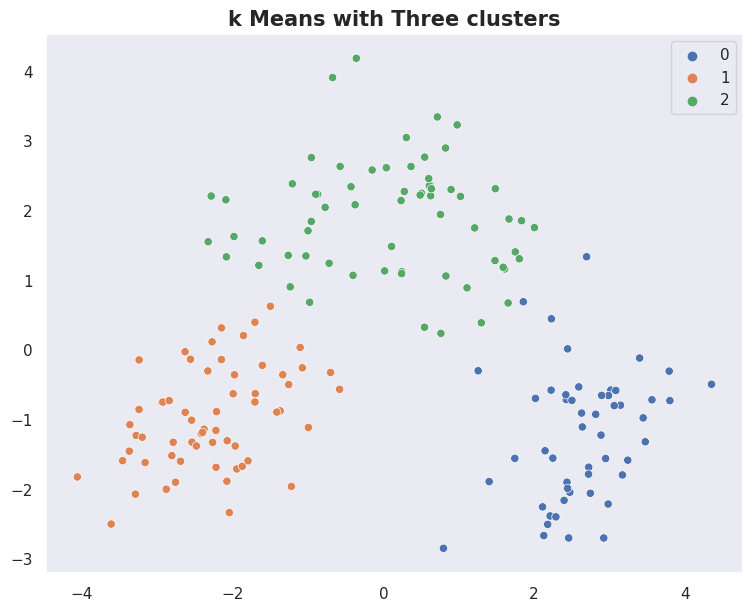

In [56]:
# Transform data to visualize data in 2d
sns.set_style('dark')
pca = decomposition.PCA(n_components=3)
wine_pca = pca.fit_transform(data_transformed)
plt.figure(figsize=(9,7))
sns.scatterplot(hue=y_kmeans, x=wine_pca[:,0], y=wine_pca[:,1],palette="deep")
plt.title("k Means with Three clusters",fontsize=15,fontweight="bold")
plt.show()

**Silhouette Score/ Calinski Harabasz Score/ Davies Bouldin Score**

In [58]:
# Calculate Silhouette Score/ Calinski Harabasz Score/ Davies Bouldin Score for 3 clusters separated by k Means
s = silhouette_score(data_transformed, y_kmeans)
c = calinski_harabasz_score(data_transformed, y_kmeans)
d = davies_bouldin_score(data_transformed, y_kmeans)
print('silhouette_score = ', round(s,3),'\ncalinski_harabasz_score = ', round(c,3), '\ndavies_bouldin_score = ' ,round(d,3))

silhouette_score =  0.301 
calinski_harabasz_score =  73.39 
davies_bouldin_score =  1.357


In [59]:
#Add to compare models table
df3 = {'model': 'kMeans', 'silhouette': s, 'calinski_harabasz': c,'davies_bouldin': d}
compare_models = compare_models.append(df3, ignore_index = True)
compare_models

<ipython-input-59-2265625c9951>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare_models = compare_models.append(df3, ignore_index = True)


model  silhouette  calinski_harabasz  davies_bouldin
0  Agglomerative    0.291535          70.003025        1.379177
1         kMeans    0.300977          73.389587        1.356672

1 . Silhouette Score:

Agglomerative: 0.291535

k-Means: 0.300977

 The k-Means model has a slightly higher silhouette score, indicating that the clusters produced by k-Means are more compact and well-separated compared to Agglomerative clustering.

2 . Calinski-Harabasz Score:

Agglomerative: 70.003025

k-Means: 73.389587

 The k-Means model has a higher Calinski-Harabasz score, suggesting that the clusters generated by k-Means have higher inter-cluster separation and intra-cluster similarity compared to Agglomerative clustering.

3 . Davies-Bouldin Score:

Agglomerative: 1.379177

k-Means: 1.356672

The k-Means model has a slightly lower Davies-Bouldin score, indicating better cluster quality in terms of the ratio of within-cluster distances to between-cluster distances.


---


Based on these scores, we can conclude that the k-Means clustering model performs slightly better than the Agglomerative clustering model for this particular dataset.

#DBSCAN Clustering

Deciding Optimal value for epsilon

1.   Plot different combinations of 𝑒𝑝𝑠𝑖𝑙𝑜𝑛 and 𝑚𝑖𝑛𝑃𝑡𝑠




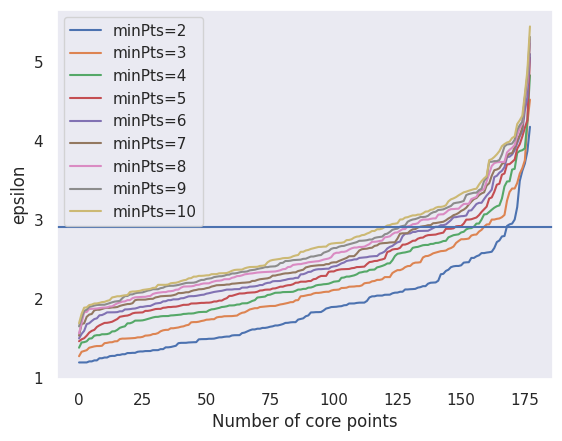

In [60]:
from sklearn.neighbors import NearestNeighbors

# we use sklearn to find the nearest neighbors
neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(data_transformed)
distances, indices = nbrs.kneighbors(data_transformed)
for k in range(1, 10):
    distances_k = np.sort(distances[:,k], axis=0)
    plt.plot(distances_k, label='minPts=%i' % (k+1))
sns.set_style('darkgrid')
plt.ylabel('epsilon')
plt.xlabel('Number of core points')
plt.axhline(2.9)
#plt.axhline(2.7)
plt.legend()
plt.show()

In [61]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3 ,min_samples=2)
dbscan.fit(data_transformed)
clusters = dbscan.labels_
len(set(clusters))
clusters

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0, -1,  0, -1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0])

In [62]:
# Data points count per label
unique, counts = np.unique(clusters, return_counts=True)
np.asarray((unique, counts)).T

array([[ -1,   6],
       [  0, 169],
       [  1,   3]])

In [63]:
s = silhouette_score(data_transformed,clusters)
c = calinski_harabasz_score(data_transformed, clusters)
d = davies_bouldin_score(data_transformed, clusters)
s,c,d

(0.13156924855971505, 3.2764923255033347, 2.8588568111251154)

In [64]:
#Add to compare models table
df5 = {'model': 'dbscan', 'silhouette': s, 'calinski_harabasz': c,'davies_bouldin': d}
compare_models = compare_models.append(df5, ignore_index = True)
compare_models

<ipython-input-64-0b5045ce1f16>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare_models = compare_models.append(df5, ignore_index = True)


model  silhouette  calinski_harabasz  davies_bouldin
0  Agglomerative    0.291535          70.003025        1.379177
1         kMeans    0.300977          73.389587        1.356672
2         dbscan    0.131569           3.276492        2.858857

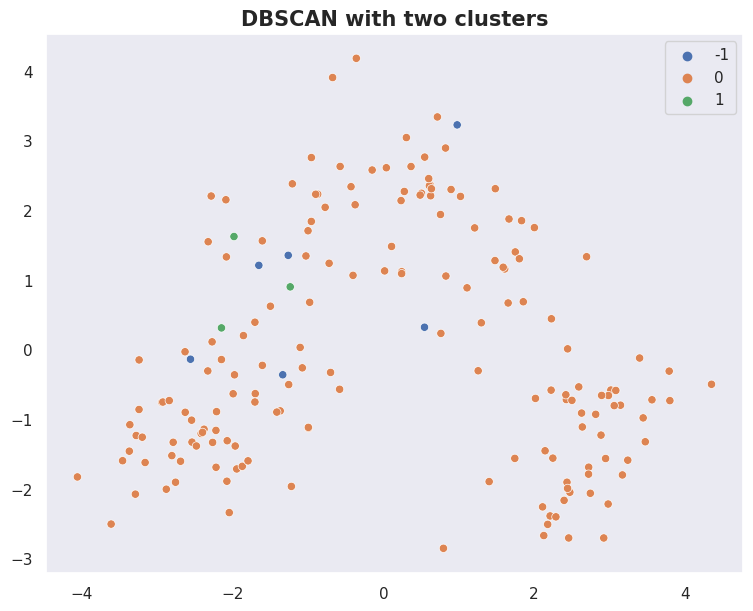

In [65]:
# Transform data to visualize data in 2d
sns.set_style('dark')
pca = decomposition.PCA(n_components=3)
wine_pca = pca.fit_transform(data_transformed)
plt.figure(figsize=(9,7))
sns.scatterplot(hue=dbscan.labels_, x=wine_pca[:,0], y=wine_pca[:,1],palette="deep")
plt.title("DBSCAN with two clusters",fontsize=15,fontweight="bold")
plt.show()


***DBSCAN ***(Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm. It differs from other clustering algorithms such as k-means and hierarchical clustering in several ways:

---



Density-Based Clustering: DBSCAN groups together data points that are close to each other in the feature space and have high density, while being separated from regions of lower density by areas of low density called "noise." It does not assume that clusters have a particular shape or follow a specific distribution.

---



Handling Arbitrary-Shaped Clusters: Unlike k-means, which assumes spherical clusters, and hierarchical clustering, which builds clusters based on hierarchical relationships, DBSCAN can discover clusters of arbitrary shape. It can handle clusters that have irregular shapes, varying densities, and clusters within clusters.


---


Automatic Cluster Size Determination: DBSCAN does not require specifying the number of clusters in advance. It automatically determines the number of clusters based on the density and connectivity of the data points.

---



Noise Detection: DBSCAN identifies noisy data points as outliers that do not belong to any cluster. These outliers are points that have low density and are not close to any high-density region. Noise detection is a valuable feature of DBSCAN as it can identify and separate outliers from the actual clusters.

---



Parameter-Based Algorithm: DBSCAN relies on two main parameters: epsilon (eps) and minimum samples (min_samples). Epsilon determines the neighborhood size around each point, while min_samples specifies the minimum number of points required to form a dense region. These parameters influence the cluster formation and can be tuned to achieve the desired clustering result.

---



Overall, DBSCAN is a powerful algorithm for discovering clusters of arbitrary shape, handling noise detection, and automatically determining the number of clusters. It is particularly useful when dealing with complex datasets where clusters have varying densities and shapes.